In [1]:
import pandas as pd

review = pd.read_csv(r"data\sentiment_anlysis.csv")

In [2]:
review

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy


In [3]:
review.shape

(38932, 5)

In [4]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [5]:
review.describe()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
count,38932,38932,38932,38932,38932
unique,38932,38932,11,3,2
top,id10326,The room was kind of clean but had a VERY stro...,Firefox,Desktop,happy
freq,1,1,7367,15026,26521


In [6]:
# Data cleaning and EDA
# checking any missing values

review.isnull().sum()

# no missing values present in the dataset


User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

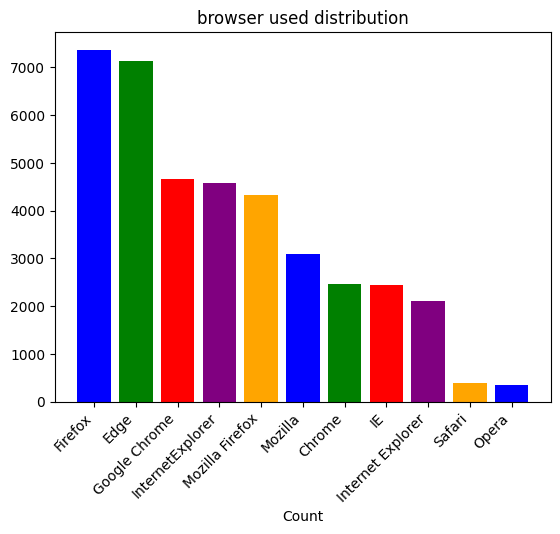

In [7]:
import matplotlib.pyplot as plt
# count distribution of each browser 

browser_counts = review['Browser_Used'].value_counts()
plt.bar(browser_counts.index, browser_counts, color = ['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Browser")
plt.xlabel("Count")
plt.title("browser used distribution")
plt.xticks(rotation = 45, ha ='right')
plt.show()

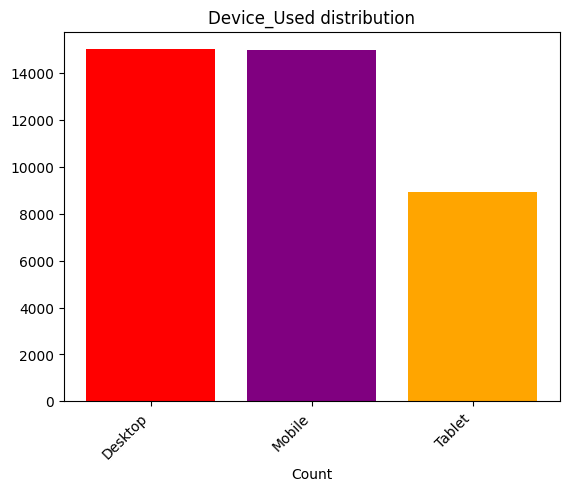

In [8]:
# count distribution of each browser 

browser_counts = review['Device_Used'].value_counts()
plt.bar(browser_counts.index, browser_counts, color = ['red', 'purple', 'orange'])
plt.xlabel("Device_Used")
plt.xlabel("Count")
plt.title("Device_Used distribution")
plt.xticks(rotation = 45, ha ='right')
plt.show()

In [9]:
# removing columns which are not relevant for the problems statement

review.drop(columns = ['User_ID','Browser_Used','Device_Used'], inplace = True)

In [10]:
review.columns

Index(['Description', 'Is_Response'], dtype='object')

In [11]:
# Text cleaning
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?/]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*','',text)
    return text


<>:7: SyntaxWarning: invalid escape sequence '\['
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:7: SyntaxWarning: invalid escape sequence '\['
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\admin\AppData\Local\Temp\ipykernel_7784\4040425030.py:7: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?/]', '', text)
C:\Users\admin\AppData\Local\Temp\ipykernel_7784\4040425030.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*','',text)


In [12]:
review['Description'] = review['Description'].apply(lambda x:clean_text(x))

In [13]:
review['Is_Response'] = review['Is_Response'].apply(lambda x:clean_text(x))

In [14]:
review['Is_Response']

0        not happy
1        not happy
2        not happy
3            happy
4        not happy
           ...    
38927        happy
38928    not happy
38929    not happy
38930    not happy
38931        happy
Name: Is_Response, Length: 38932, dtype: object

In [15]:
review['Is_Response'].value_counts()

Is_Response
happy        26521
not happy    12411
Name: count, dtype: int64

In [16]:
## independent features and dependent 
y=pd.get_dummies(review['Is_Response'], drop_first=True)

In [17]:
y

,not happy
0,True
1,True
2,True
3,False
4,True
...,...
38927,False
38928,True
38929,True
38930,True


In [18]:
x = review['Description']

In [36]:
x

0        the room was kind of clean but had a very stro...
1        i stayed at the crown plaza april   april   th...
2        i booked this hotel through hotwire at the low...
3        stayed here with husband and sons on the way t...
4        my girlfriends and i stayed here to celebrate ...
                               ...                        
38927    we arrived late at night and walked in to a ch...
38928    the only positive impression is location and p...
38929    traveling with friends for shopping and a show...
38930    the experience was just ok we paid extra for a...
38931    the westin is a wonderfully restored grande da...
Name: Description, Length: 38932, dtype: object

In [19]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [20]:
x_train


36103    the price of the mosser was excellent when com...
36251    i was surprised how much i liked this hotel it...
21966    all the people at the front desk and the entir...
30445    clean comfortable affordable and convenient th...
6542     just returned from new york today stayed at ma...
                               ...                        
20757    my husband and i stayed at four points sherato...
32103    we stayed at the bryant for our year wedding a...
30403    very clean small room with king size bed but d...
21243    i found this hotel on internet for a wedding a...
2732     stayed here in midmay me my wife and our toddl...
Name: Description, Length: 31145, dtype: object

In [21]:
# creating the BOW
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(max_features=2500, ngram_range=(1,2))
#tf_idf = TfidfVectorizer()
x_train = cv.fit_transform(x_train).toarray()

In [22]:
x_train

array([[0, 0, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 2, 0]], dtype=int64)

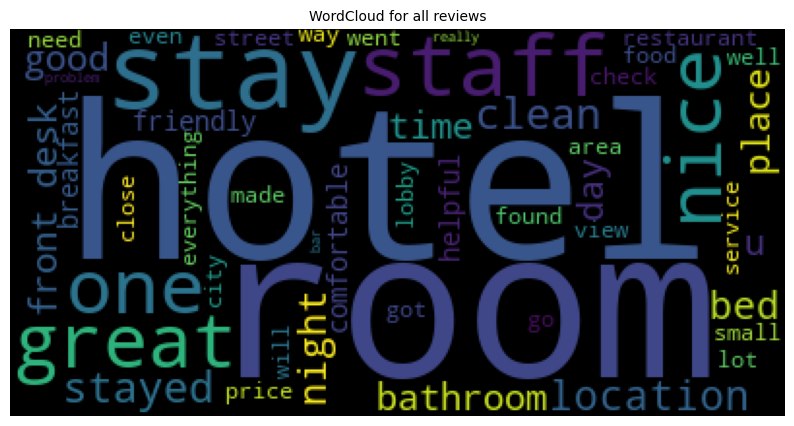

In [23]:
from wordcloud import WordCloud

# combining all the reviews for wordcloud
reviews = ''.join([review for review in review['Description']])

# initialize wordcloud object
wc = WordCloud(background_color = 'Black', max_words = 50)

# Generate and plot wordcloud
plt.figure(figsize = (10,10))
plt.imshow(wc.generate(reviews))
plt.title('WordCloud for all reviews', fontsize = 10)
plt.axis('off')
plt.show()

In [24]:
x_train.shape

(31145, 2500)

In [25]:
y_train.shape

(31145, 1)

In [26]:
x_test = cv.transform(x_test).toarray()

In [27]:
cv.vocabulary_

{'the': 1873,
 'price': 1505,
 'of': 1338,
 'was': 2258,
 'excellent': 638,
 'when': 2397,
 'compared': 449,
 'to': 2064,
 'other': 1396,
 'hotels': 932,
 'and': 67,
 'what': 2394,
 'you': 2477,
 'would': 2460,
 'pay': 1447,
 'if': 952,
 'booked': 298,
 'directly': 544,
 'through': 2049,
 'hotel': 906,
 'our': 1401,
 'experience': 648,
 'ok': 1363,
 'rooms': 1620,
 'are': 154,
 'decorated': 518,
 'nicely': 1292,
 'its': 1065,
 'in': 966,
 'great': 809,
 'location': 1139,
 'as': 177,
 'far': 666,
 'cable': 355,
 'cars': 373,
 'shopping': 1679,
 'etc': 623,
 'however': 942,
 'good': 796,
 'place': 1466,
 'stay': 1790,
 'youre': 2498,
 'really': 1545,
 'looking': 1152,
 'for': 705,
 'just': 1078,
 'your': 2495,
 'head': 869,
 'small': 1719,
 'with': 2432,
 'not': 1315,
 'much': 1247,
 'room': 1601,
 'relaxing': 1565,
 'bathrooms': 242,
 'couldnt': 487,
 'even': 624,
 'my': 1253,
 'face': 653,
 'sink': 1704,
 'dont': 561,
 'have': 857,
 'also': 52,
 'middle': 1218,
 'night': 1294,
 'we': 2

In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier().fit(x_train, y_train)

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [29]:
y_pred = classifier.predict(x_test)

In [30]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [31]:
accuracy_score(y_test,y_pred)

0.8446128162321819

In [32]:
confusion_matrix(y_test,y_pred)

array([[5058,  227],
       [ 983, 1519]], dtype=int64)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.84      0.96      0.89      5285
        True       0.87      0.61      0.72      2502

    accuracy                           0.84      7787
   macro avg       0.85      0.78      0.80      7787
weighted avg       0.85      0.84      0.84      7787



In [34]:
model = {'RandomForestClassifier': 1}


In [35]:
model[key]

NameError: name 'key' is not defined